In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Other Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

In [65]:
df = pd.read_csv('/kaggle/input/loan-approval-risk-analysis-dataset/train.csv')
df

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [66]:
df_test= pd.read_csv('/kaggle/input/loan-approval-risk-analysis-dataset/test (3).csv')
df_test

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [69]:
def preprocess_dataframe(df):
    df.drop('ID',axis=1,inplace=True)
    df.dropna(inplace=True)
    df_cat = df.select_dtypes(include='object')
    df_cat = pd.concat([df_cat, df[['Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email']]], axis=1)
    df_num = df.select_dtypes(exclude='object')
    df_num.drop(['Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email'], axis=1, inplace=True)
    df_num.drop('Is high risk', axis=1, inplace=True)
    df_num = df_num.abs()
    df_num['Age'] = df_num['Age'] / 365
    df_num['Age'] = df_num['Age'].astype(int)
    df_num['Employment length'] = df_num['Employment length'] / 365
    df_num['Employment length'] = df_num['Employment length'].astype(int)
    df_cat.drop('Has a mobile phone', axis=1, inplace=True)
    df_num.reset_index(drop=True, inplace=True)
    for col in df_cat.columns:
        df_cat[col] = pd.Categorical(df_cat[col]).codes
    df_cat.reset_index(drop=True, inplace=True)
    X = pd.concat([df_num, df_cat], axis=1)
    y = df['Is high risk']
    y.reset_index(drop=True, inplace=True)
    return X, y

In [70]:
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

In [71]:
def normalize_train(X_train):
    X_train_num = X_train[['Age', 'Children count', 'Income', 'Employment length', 'Family member count', 'Account age']]
    X_train_cat = X_train.drop(['Age', 'Children count', 'Income', 'Employment length', 'Family member count', 'Account age'], axis=1)
    
    X_train_num_arr = scaler.fit_transform(X_train_num)
    X_train_num = pd.DataFrame(X_train_num_arr, columns=X_train_num.columns)

    X_train_cat_arr = scaler1.fit_transform(X_train_cat)
    X_train_cat = pd.DataFrame(X_train_cat_arr, columns=X_train_cat.columns)
    
    X_train_num.reset_index(drop=True, inplace=True)
    X_train_cat.reset_index(drop=True, inplace=True)
    X_train = pd.concat([X_train_num, X_train_cat], axis=1)
    return X_train

In [72]:
def normalize_test(X_test):
    X_test_num = X_test[['Age', 'Children count', 'Income', 'Employment length', 'Family member count', 'Account age']]
    X_test_cat = X_test.drop(['Age', 'Children count', 'Income', 'Employment length', 'Family member count', 'Account age'], axis=1)
    X_test_num_arr = scaler.transform(X_test_num)
    X_test_num = pd.DataFrame(X_test_num_arr, columns=X_test_num.columns)

    X_test_cat_arr = scaler1.transform(X_test_cat)
    X_test_cat = pd.DataFrame(X_test_cat_arr, columns=X_test_cat.columns)
    
    X_test_num.reset_index(drop=True, inplace=True)
    X_test_cat.reset_index(drop=True, inplace=True)
    X_test = pd.concat([X_test_num, X_test_cat], axis=1)
    return X_test

In [73]:
X_train, y_train = preprocess_dataframe(df)
X_test, y_test = preprocess_dataframe(df_test)

In [74]:
X_train = normalize_train(X_train)
X_test = normalize_test(X_test)

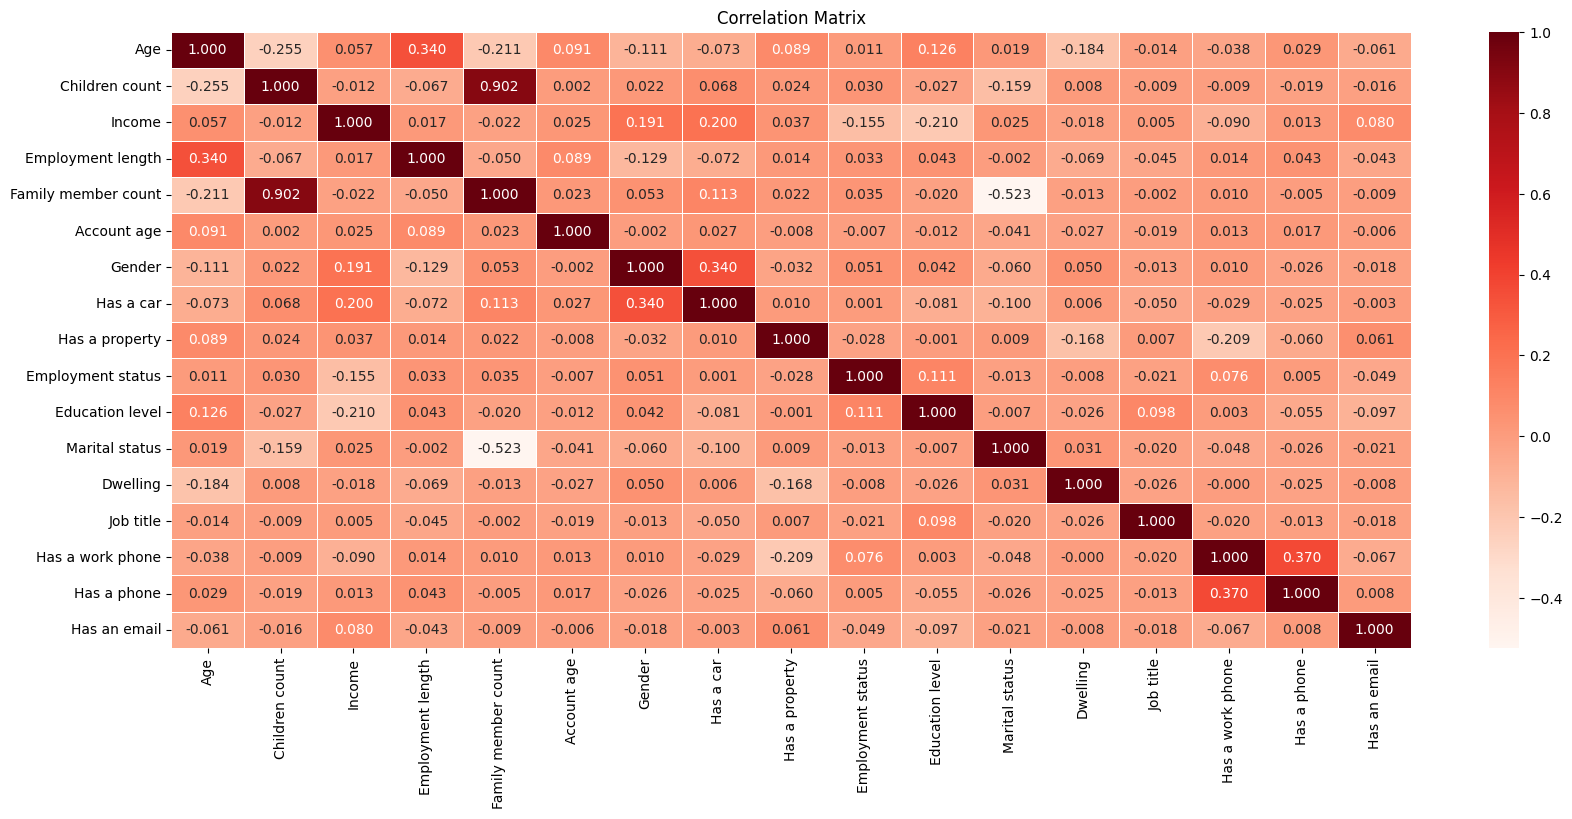

In [75]:
corr_matrix = X_train.corr()
plt.figure(figsize=(20, 8))  # Optional: To adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

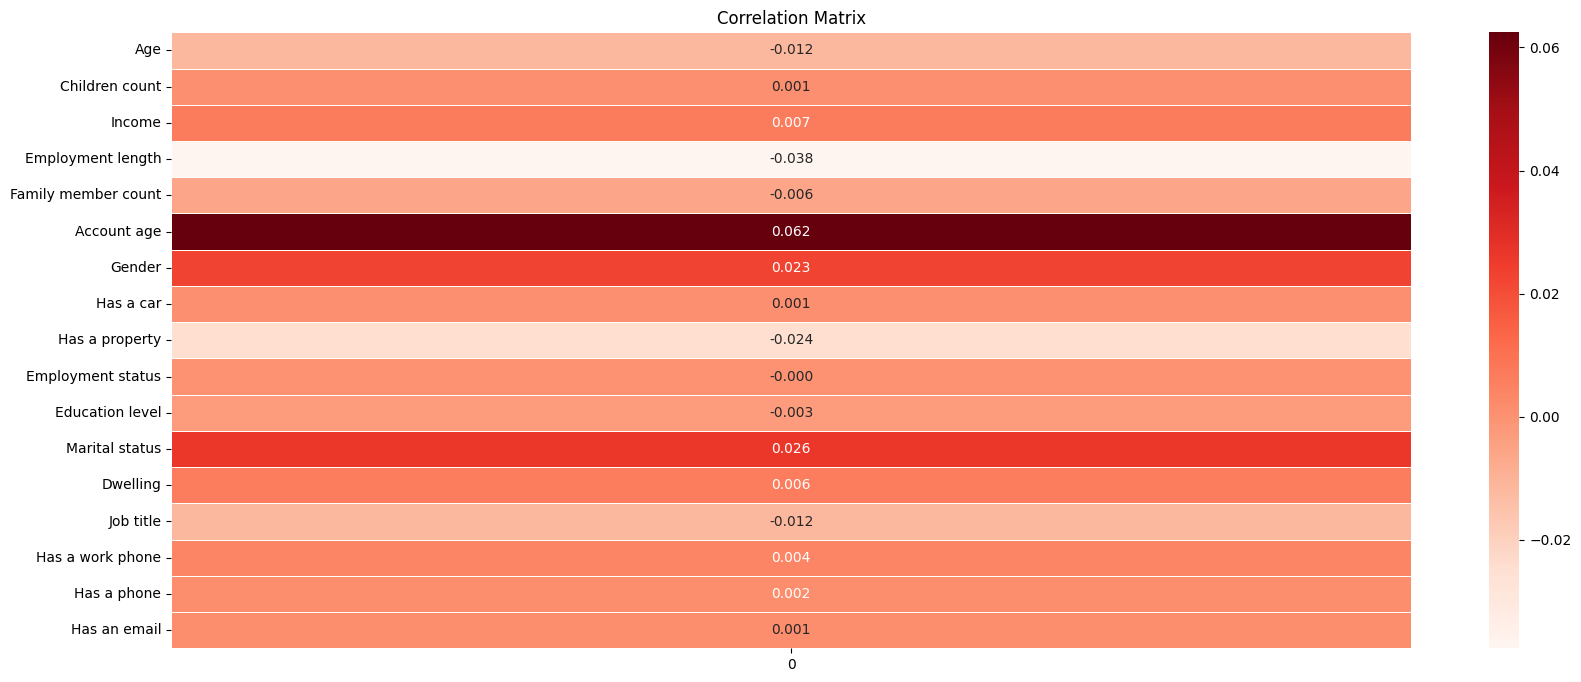

In [76]:
corr_matrix = X_train.corrwith(y_train).to_frame()
plt.figure(figsize=(20, 8))  # Optional: To adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

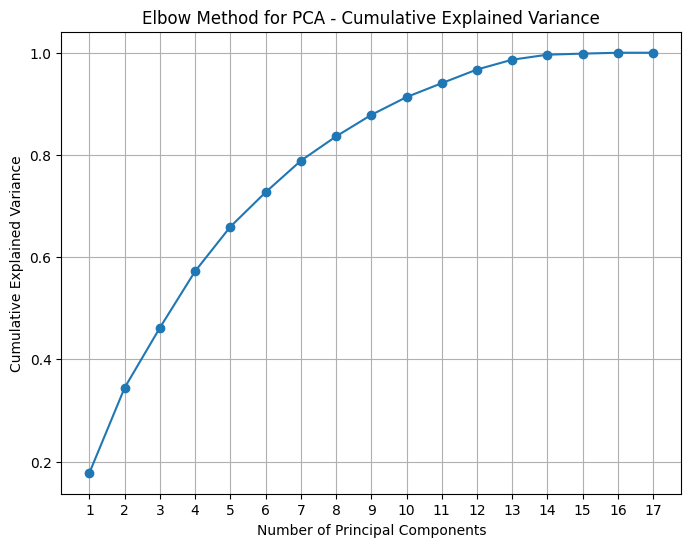

In [77]:
pca = PCA()
pca.fit(X_train)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the Elbow method (Cumulative Explained Variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Elbow Method for PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

In [78]:
n_components_95_variance = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components explaining 95% variance: {n_components_95_variance}')

Number of components explaining 95% variance: 12


In [79]:
X_train_pca = pca.transform(X_train)[:, :n_components_95_variance]
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(1, n_components_95_variance + 1)])
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.932171,-0.306999,-0.051731,-0.409138,0.034677,-0.039879,-0.113494,-0.044187,-0.148713,0.325421,-0.036285,0.329208
1,0.202234,-0.108107,-0.358499,1.084129,-0.624526,0.099255,0.223002,-0.216513,-0.464606,0.449080,0.295125,0.044344
2,-0.502300,-0.673596,0.142497,0.420180,0.241986,-0.261972,-0.237537,-0.049555,0.189915,0.001159,-0.131070,0.136135
3,0.180184,-0.683361,0.473357,0.759958,-0.513094,0.060193,0.401480,0.665845,-0.163818,-0.053535,0.492948,-0.459138
4,0.150350,0.161824,0.220440,-0.395371,-0.625839,-0.853881,0.079090,0.104457,-0.385997,0.481853,-0.117598,0.026359
...,...,...,...,...,...,...,...,...,...,...,...,...
20133,0.174407,0.090731,-0.917373,-0.228874,0.572462,0.257235,-0.067062,-0.033003,-0.320807,0.079533,0.104233,-0.157623
20134,0.246823,0.038598,-0.616651,0.197841,-0.891250,0.251580,0.237070,-0.179554,-0.278856,-0.218822,-0.075344,0.013859
20135,-0.623176,-0.120091,0.678410,0.412107,0.277764,0.298077,-0.429477,-0.057623,-0.408764,0.396269,-0.217760,0.232041
20136,-0.513135,-0.676120,0.149410,0.409224,0.227954,-0.254773,-0.223002,-0.064363,0.045925,0.342266,-0.169389,-0.048683


In [23]:
count_class_0, count_class_1 = np.bincount(y_train)
scale_pos_weight = count_class_0 / count_class_1
# Create the XGBoost model
modelxgb = XGBClassifier(
    objective='binary:logistic',   # Binary classification
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
    eval_metric='logloss'  ,        # Suppress warning
    use_label_encoder=False,
    random_state=42,
    max_depth=12,
    n_estimators=1000,
    learning_rate=0.001
)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(modelxgb, X_resampled, y_resampled, cv=stratified_kfold, scoring='recall_weighted')

print("Cross-Validation Recall: ", scores.mean())
print("\n")
# Fit the model on the resampled dataset
modelxgb.fit(X_resampled, y_resampled)

Cross-Validation Recall:  0.6375417659658715




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [24]:
X_test_pca = pca.transform(X_test)[:, :n_components_95_variance]
y_pred = modelxgb.predict(X_test_pca)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Recall: 0.8717948717948718
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.28      0.44      4918
           1       0.02      0.87      0.04        78

    accuracy                           0.29      4996
   macro avg       0.51      0.58      0.24      4996
weighted avg       0.98      0.29      0.43      4996



In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Activation, GlobalMaxPooling1D

In [144]:
input_layer = Input(shape=(X_train_pca.shape[1], 1))

# VGG Block 1
x = Conv1D(64, kernel_size=3, padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2)(x)

# VGG Block 2
x = Conv1D(128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2)(x)

# VGG Block 3 - Switch to GlobalMaxPooling after convolutions to avoid shape issues
x = Conv1D(256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalMaxPooling1D()(x)  # GlobalMaxPooling to prevent dimension issues

# Fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1000, activation='relu')(x)

# Output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_89 (Conv1D)              │ (None, 12, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_90 (Conv1D)              │ (None, 12, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_90          │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_91 (Conv1D)              │ (None, 6, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_92 (Conv1D)              │ (None, 6, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_93 (Conv1D)              │ (None, 3, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_91 (Activation)      │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_94 (Conv1D)              │ (None, 3, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_92 (Activation)      │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_95 (Conv1D)              │ (None, 3, 256)         │       196,86

 Total params: 22,713,361 (86.64 MB)

 Trainable params: 22,710,545 (86.63 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [117]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [118]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [83]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [84]:
X_train_pca = np.array(X_train_pca)
X_test_pca = np.array(X_test_pca)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [119]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
trained = model.fit(X_train_pca, y_train, epochs=30, batch_size=256, validation_data=(X_test_pca,y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint], class_weight= class_weight_dict)

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.6699 - loss: 0.7055 - val_accuracy: 0.9844 - val_loss: 0.6113 - learning_rate: 0.0010
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4726 - loss: 0.6825 - val_accuracy: 0.1787 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4566 - loss: 0.6363 - val_accuracy: 0.0536 - val_loss: 0.8899 - learning_rate: 0.0010
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3941 - loss: 0.6777 - val_accuracy: 0.8153 - val_loss: 0.4518 - learning_rate: 0.0010
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6945 - loss: 0.6700 - val_accuracy: 0.5286 - val_loss: 0.6561 - learning_rate: 0.0010
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4767 - loss: 0.6406 - val_accuracy: 0.3283 - val_loss: 0.7107 - learning_rate: 0.0010
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4141 - loss: 0.6671 - val_ac

Text(0.5, 0, 'Epoch')

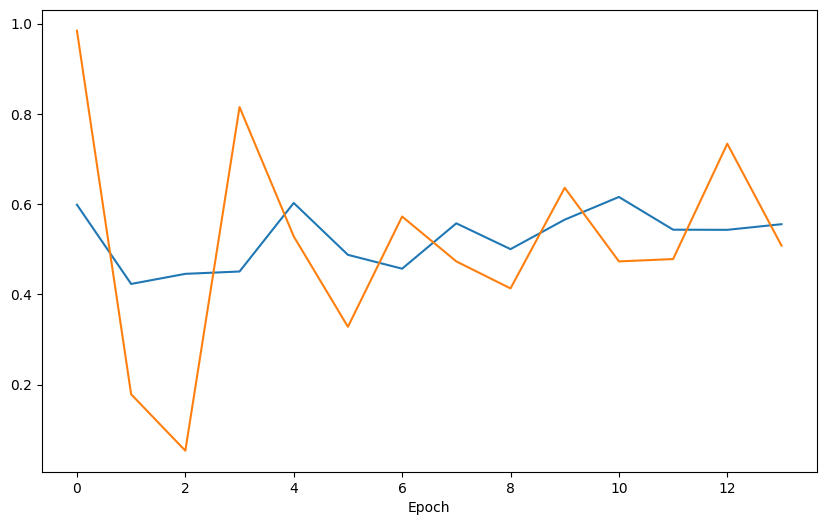

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.382906325060048
Precision: 0.9710852709035561
Recall: 0.382906325060048
F1 Score: 0.538920983715173

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.38      0.55      4918
           1       0.02      0.67      0.03        78

    accuracy                           0.38      4996
   macro avg       0.50      0.52      0.29      4996
weighted avg       0.97      0.38      0.54      4996



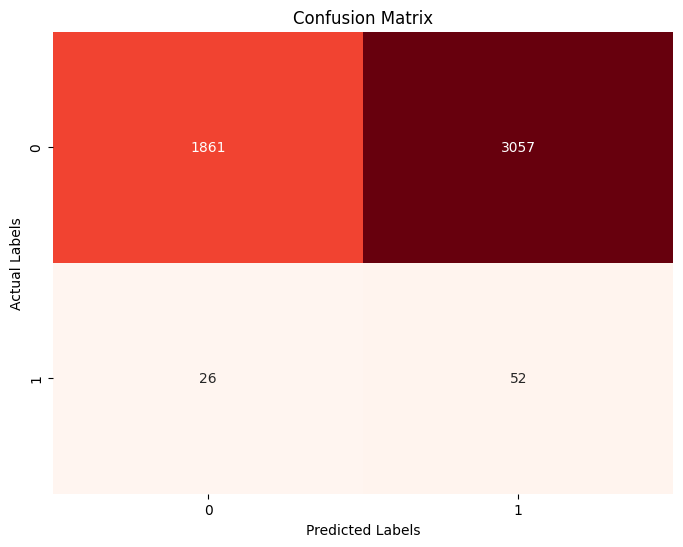

In [127]:
y_pred = model.predict(X_test_pca)
y_pred = y_pred>0.28 # Get the predicted class labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()